In [4]:
import tensorflow as tf
import pandas as pd
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## Load Data

In [2]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [5]:
import io
df = pd.read_csv(io.BytesIO(uploaded['data.csv']))

In [6]:
df

,Unnamed: 0,title,text,label,Government News,Middle-east,News,US_News,left-news,politics,politicsNews,worldnews
0,0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,1,0,0,0,0,0,0,1,0
1,1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,1,0,0,0,0,0,0,1,0
2,2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,1,0,0,0,0,0,0,1,0
3,3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,1,0,0,0,0,0,0,1,0
4,4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
44893,23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,0,0,1,0,0,0,0,0,0
44894,23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,0,0,1,0,0,0,0,0,0
44895,23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,0,0,1,0,0,0,0,0,0
44896,23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,0,0,1,0,0,0,0,0,0


In [7]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [8]:
df.head(3)

,title,text,label,Government News,Middle-east,News,US_News,left-news,politics,politicsNews,worldnews
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,1,0,0,0,0,0,0,1,0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,1,0,0,0,0,0,0,1,0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,1,0,0,0,0,0,0,1,0


In [9]:
train = df[:30000]
test = df[30000:]

train_sentences = train['title'].tolist()
test_sentences = test['title'].tolist()

## **Tokenize Dataset**

In [10]:
vocab_size = 5000
embedding_dim = 16
max_length = 500
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'

In [16]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(train_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type)

testing_sequences = tokenizer.texts_to_sequences(test_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

## **Building the Model**

In [17]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(tf.keras.layers.Bidirectional(
    tf.keras.layers.LSTM(300, dropout=0.3, recurrent_dropout=0.3)
))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 16)           80000     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 600)               760800    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 601       
Total params: 841,401
Trainable params: 841,401
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [19]:
cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

In [20]:
data_model = model.fit(training_padded, train['label'], epochs=50, validation_data=(testing_padded, test['label']), callbacks=[cb])

Epoch 1/50
938/938 [==============================] - 3262s 3s/step - loss: 0.2394 - accuracy: 0.8969 - val_loss: 0.3269 - val_accuracy: 0.8830
Epoch 2/50
938/938 [==============================] - 3294s 4s/step - loss: 0.0623 - accuracy: 0.9777 - val_loss: 0.4105 - val_accuracy: 0.8556
Epoch 3/50
938/938 [==============================] - 3309s 4s/step - loss: 0.0432 - accuracy: 0.9853 - val_loss: 0.3335 - val_accuracy: 0.8924


In [21]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Loss')

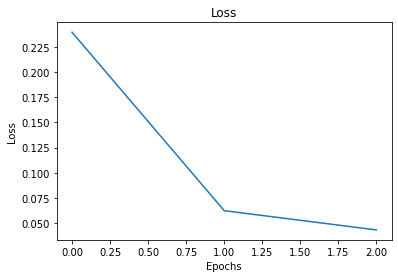

In [23]:
plt.plot(data_model.history['loss'])
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

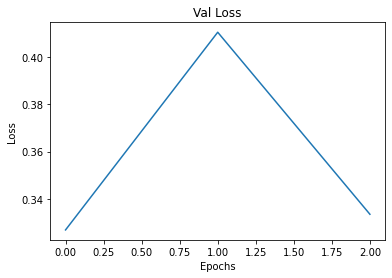

In [24]:
plt.plot(data_model.history['val_loss'])
plt.title('Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Val Loss')

Text(0, 0.5, 'Acuracy')

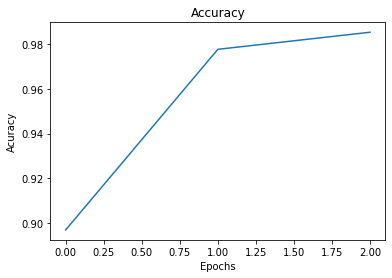

In [25]:
plt.plot(data_model.history['accuracy'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acuracy')

Text(0, 0.5, 'Val Accuracy')

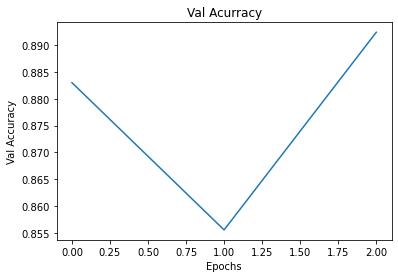

In [26]:
plt.plot(data_model.history['val_accuracy'])
plt.title('Val Acurracy')
plt.xlabel('Epochs')
plt.ylabel('Val Accuracy')